# Autograd: automatic differentiation

In [3]:
from IPython.display import Image

Central to all neural networks in PyTorch is the autograd package. Let’s first briefly visit this, and we will then go to training our first neural network.

The autograd package provides automatic differentiation for all operations on Tensors. It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

Let us see this in more simple terms with some examples.

In autograd, we introduce a Variable class, which is a very thin wrapper around a Tensor. You can access the raw tensor through the .data attribute, and after computing the backward pass, a gradient w.r.t. this variable is accumulated into .grad attribute.


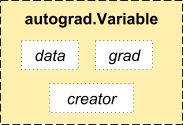

In [4]:
Image("Variable.png")

Variable

There’s one more class which is very important for autograd implementation - a Function. Variable and Function are interconnected and build up an acyclic graph, that encodes a complete history of computation. Each variable has a .grad_fn attribute that references a function that has created a function (except for Variables created by the user - these have None as .grad_fn).

If you want to compute the derivatives, you can call .backward() on a Variable. If Variable is a scalar (i.e. it holds a one element tensor), you don’t need to specify any arguments to backward(), however if it has more elements, you need to specify a grad_output argument that is a tensor of matching shape.

In [5]:
from IPython.display import Image
import torch
from torch.autograd import Variable


Create a variable:

In [6]:
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



Do an operation of variable:

In [8]:
y = x + 2
print(y)


Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



y was created as a result of an operation, so it has a grad_fn.

In [9]:
print(y.grad_fn)

Do more operations on y

In [11]:
z = y * y * 3
out = z.mean()
print(y)
print(z, out)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



## Gradients

let’s backprop now out.backward() is equivalent to doing out.backward(torch.Tensor([1.0]))

In [12]:
out.backward()

print gradients d(out)/dx

In [13]:
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



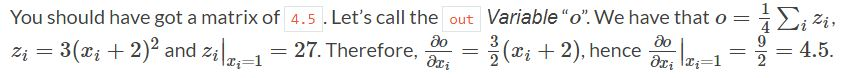

In [2]:
from IPython.display import Image
Image("gradients.JPG")